In [5]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

data_raw = pd.read_csv("../Data/data2.tsv", sep="\t", index_col=0)
data_XY = data_raw.drop(columns=data_raw.columns[0:1])
data_XY = data_XY.drop(columns=data_XY.columns[-1:])
X = data_XY.drop(columns=data_XY.columns[0:1])
y = data_XY.drop(columns=data_XY.columns[1:])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
clf = DecisionTreeClassifier(random_state=0, criterion="log_loss")

In [3]:
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=100)
display(np.mean(scores))

1.0

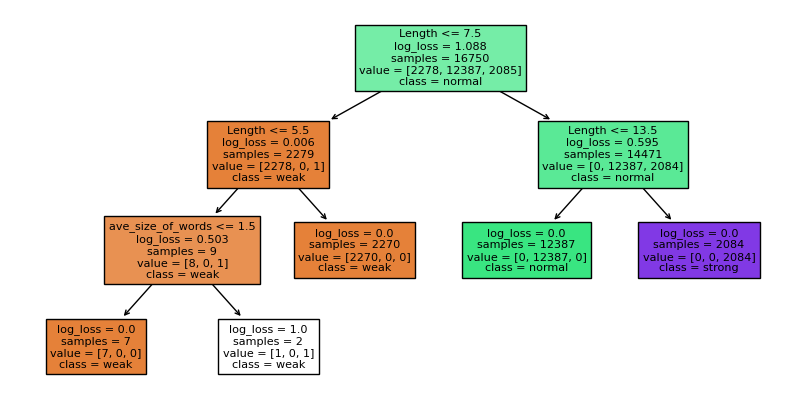

In [43]:
fig = plt.figure(figsize=(10, 5))
_ = tree.plot_tree(clf, feature_names=X.columns, class_names=["weak", "normal", "strong"], filled=True)